#Importing all the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import nltk
import warnings
warnings.filterwarnings("ignore") 

# Reading the dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Amazon Prod Reviews/Reviews (1).csv")

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Data Preprocessing

In [10]:
df['Helpfulness%'] = np.where(df['HelpfulnessDenominator']>0, df['HelpfulnessNumerator']/df['HelpfulnessDenominator'], -1)

In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [14]:
df['%upvote'] = pd.cut(df['Helpfulness%'], bins =[-1, 0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['Empty', '0-20%', '20-40%','40-60%','60-80%','80-100%'])

In [15]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [17]:
df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpfulness%  
Score %upvote                                                                 
1     Empty                      8060    8060     8060    8060          8060  
      0-20%                      2338    2338     2338    2338          2338  
      20-40%                     4649    4649     4649    4649          4649  
      40-60%                     6586    6586     6586    6586          6586  
      60-80%                     5838    5838     5838    5838          5838  
      80-100%                   12531   12531    12531   12531         12531  
2     Empty                      4234    4234     4234    4234          4234  
      0-20%                       762     762      737     762           762  
      20-40%                     1618    1618     1618    1618          1618  
      40-60%                     3051    3051     3051    3051          3051  
      60-80%                     2486    2486     2486    2486          2486  
      80-100%                    7014    7014     7014    7014          7014  
3     Empty                      5062    5062     5062    5062          5062  
      0-20%                       474     474      474     474           474  
      20-40%                     1506    1506     1506    1506          1506  
      40-60%                     3384    3384     3384    3384          3384  
      60-80%                     2754    2754     2754    2754      

## Creating Pivot Table for better conclusion

In [21]:
df_s = df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()

In [23]:
pivot = df_s.pivot(index = '%upvote', columns = 'Score') 

## Plotting the heatmap

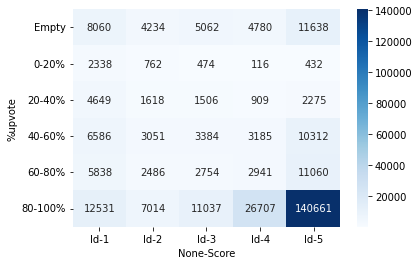

In [28]:
import seaborn as sns
sns.heatmap(pivot, annot = True, cmap = 'Blues', fmt = 'g')

In [29]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [30]:
df2 = df[df['Score']!=3]

In [31]:
df2.Score.unique()

array([5, 1, 4, 2])

In [34]:
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

## Converting the text into vectors using NLP

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [40]:
X = df2['Text']
X_c = cv.fit_transform(X)
X_c.shape

(525814, 114969)

In [41]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


# Train-test split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


# Model Building

In [44]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9362971077335037


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
w = cv.get_feature_names()
w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [50]:
coef = ml.coef_.tolist()[0]
coef

[-0.3384106067523823,
 0.14481587208040606,
 0.4290296112915057,
 -0.0020868202160329026,
 -0.00996636603124889,
 0.0,
 0.0002824561250024525,
 -0.022329813047055915,
 0.0004828097159465051,
 0.000314234199525924,
 0.0,
 -0.01197723190859385,
 0.0049494780013941584,
 0.013280532121246505,
 -0.38201425526951077,
 0.007765976606562223,
 0.000993389604779384,
 0.0028638701093399955,
 0.0016694902095011745,
 4.766162963443056e-05,
 0.08593846264152497,
 0.02250847265817196,
 0.03324799397587077,
 0.03324799397587077,
 0.03324799397587077,
 0.03324799397587077,
 0.03324799397587077,
 0.03324799397587077,
 0.03324799397587077,
 0.03324799397587077,
 0.03324799397587077,
 -0.0002167674372610938,
 0.0,
 0.0,
 -0.09173285729038251,
 -0.000427945690306804,
 0.0001222795376081437,
 0.0032747271984595464,
 0.057299283806327095,
 1.684593644957542e-05,
 -0.10858874008944923,
 0.012965003320864851,
 6.469242923546321e-05,
 0.0034145866416088267,
 -0.07073623219933674,
 5.947977229314821e-05,
 0.0099

In [51]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})

In [52]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,3.647300
39072,downside,2.992016
94667,skeptical,2.896278
39214,drawback,2.446532
5865,addicting,2.445643
...,...,...
67898,mediocre,-2.975823
106852,unacceptable,-2.990922
113164,worst,-3.040726
34989,deceptive,-3.170702


In [53]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
      Word  Coefficient
pleasantly     3.647300
  downside     2.992016
 skeptical     2.896278
  drawback     2.446532
 addicting     2.445643
  hesitant     2.405928
    hooked     2.291795
 delighted     2.271955
   easiest     2.243294
    brings     2.157374
economical     2.133509
    resist     2.133450
  terrific     2.131253
       met     2.109262
   worries     2.101843
      whim     2.083960
      calm     2.070940
     ocean     2.019446
    delish     2.001826
 excellent     1.986288


-Top 20 negative-
          Word  Coefficient
       vomited    -2.348278
          lame    -2.383712
disappointment    -2.419242
    flavorless    -2.448696
         blech    -2.470223
         lousy    -2.517851
   unappealing    -2.545176
        lacked    -2.550505
    returnable    -2.566359
    overpowers    -2.595801
        ripoff    -2.758935
   embarrassed    -2.771020
     cancelled    -2.775099
   disapointed    -2.870687
 disappointing    -2.972984
      medi

# Creating a function so that it can apply mutliple NLP Techniques + Multiple Ml algos in such a way that it acheives best accuracy

In [54]:
### create a function 

def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [56]:
text_fit(X, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model Accuracy: 0.9361297488094694


-Top 20 positive-
      Word  Coefficient
pleasantly     4.553381
  downside     3.502028
 addicting     3.161373
    resist     2.645182
    hooked     2.616010
 skeptical     2.601307
 delighted     2.588981
   worries     2.570394
  drawback     2.541052
    delish     2.512674
   trainer     2.286322
   worried     2.218813
  soothing     2.190417
economical     2.170704
  terrific     2.109559
  tastiest     2.105128
   welcome     2.076302
      beat     2.068172
      whim     2.067003
    solved     2.035319


-Top 20 negative-
          Word  Coefficient
         blech    -2.365800
       glowing    -2.390680
       vomited    -2.407306
    unbearable    -2.433479
        lacked    -2.451952
disappointment    -2.486903
    overpowers    -2.490340
       defeats    -2.632718
         lousy    -2.633447
      mediocre    -2.643729
   disapointed    -2.711866
   embarrassed    -2.815646
    returnable    -2.828944
 disappointing    -3.228563
 

## Defining the predict function

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [59]:
predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
[[ 15007   2687]
 [  5736 108024]]
0.9359243537663365


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model Accuracy: 0.9355135636800705


-Top 20 positive-
      Word  Coefficient
     great    13.369259
 delicious    12.305692
      best    11.827056
   perfect    10.387622
     loves     9.728168
 excellent     9.477869
      love     8.814336
    highly     8.749153
 wonderful     8.056459
   awesome     7.719037
      good     7.609263
   amazing     7.520595
pleasantly     7.501945
  favorite     7.377987
    hooked     7.275647
      nice     7.172172
     yummy     6.852410
      glad     6.672156
    smooth     6.605122
   pleased     6.584636


-Top 20 negative-
          Word  Coefficient
        hoping    -5.735446
       sounded    -5.943047
          yuck    -6.090183
    disgusting    -6.171378
         worse    -6.230431
     tasteless    -6.458172
        return    -6.481492
         stale    -6.557786
         bland    -6.640766
   undrinkable    -6.698861
         threw    -6.731081
          weak    -6.879847
 unfortunately    -7.889226
      horrible    -8.035864
d

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14095   2264]
 [  6440 108655]]
0.9337867238729898


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
